In [1]:
import cv2
import imutils
from pyzbar import pyzbar
from skimage.transform import radon
import numpy as np
from  matplotlib import pyplot as plt

In [2]:
def scale_frame(scale: int, frm):

    width = int(frm.shape[1] * scale / 100)
    height = int(frm.shape[0] * scale / 100)
    dim = (width, height)
    frm = cv2.resize(frm, dim, interpolation=cv2.INTER_AREA)

    return frm

In [3]:
def draw_barcode(decoded, image):

    image = cv2.rectangle(image,
                          (decoded.rect.left, decoded.rect.top),
                          (decoded.rect.left + decoded.rect.width,
                           decoded.rect.top + decoded.rect.height),
                          color=(0, 0, 255),
                          thickness=2)
    return image

In [4]:
def barcode_read_iter(frame, step: int, number_of_rotation: int):

    frame_copy = frame.copy()

    for i in range(number_of_rotation):

        angle = i * step

        frame = imutils.rotate_bound(frame_copy, angle)
        decoded_objects = pyzbar.decode(frame)

        for obj in decoded_objects:
            data_barcode = bytes.decode(obj.data)
            frame = draw_barcode(obj, frame)
            type_barcode = obj.type
            return [frame, data_barcode, type_barcode, angle]

    return [frame, 'None', 'None', 0]

In [5]:
def barcode_read_radon(frame):

    rotated = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, rotated = cv2.threshold(rotated, 40, 255, cv2.THRESH_BINARY)
    rotated = rotated - np.mean(rotated)
    sinogram = radon(rotated)

    r = np.array([np.sqrt(np.mean(np.abs(line) ** 2)) for line in
                  sinogram.transpose()])
    r = np.argmax(r)

    angle = (r - 90) if r > 0 else r

    rotated = imutils.rotate_bound(frame, angle)
    decoded_objects = pyzbar.decode(rotated)

    for obj in decoded_objects:
        data_barcode = bytes.decode(obj.data)
        rotated = draw_barcode(obj, rotated)
        type_barcode = obj.type
        return [rotated, data_barcode, type_barcode, angle]

    return [rotated, 'None', 'None', 0]

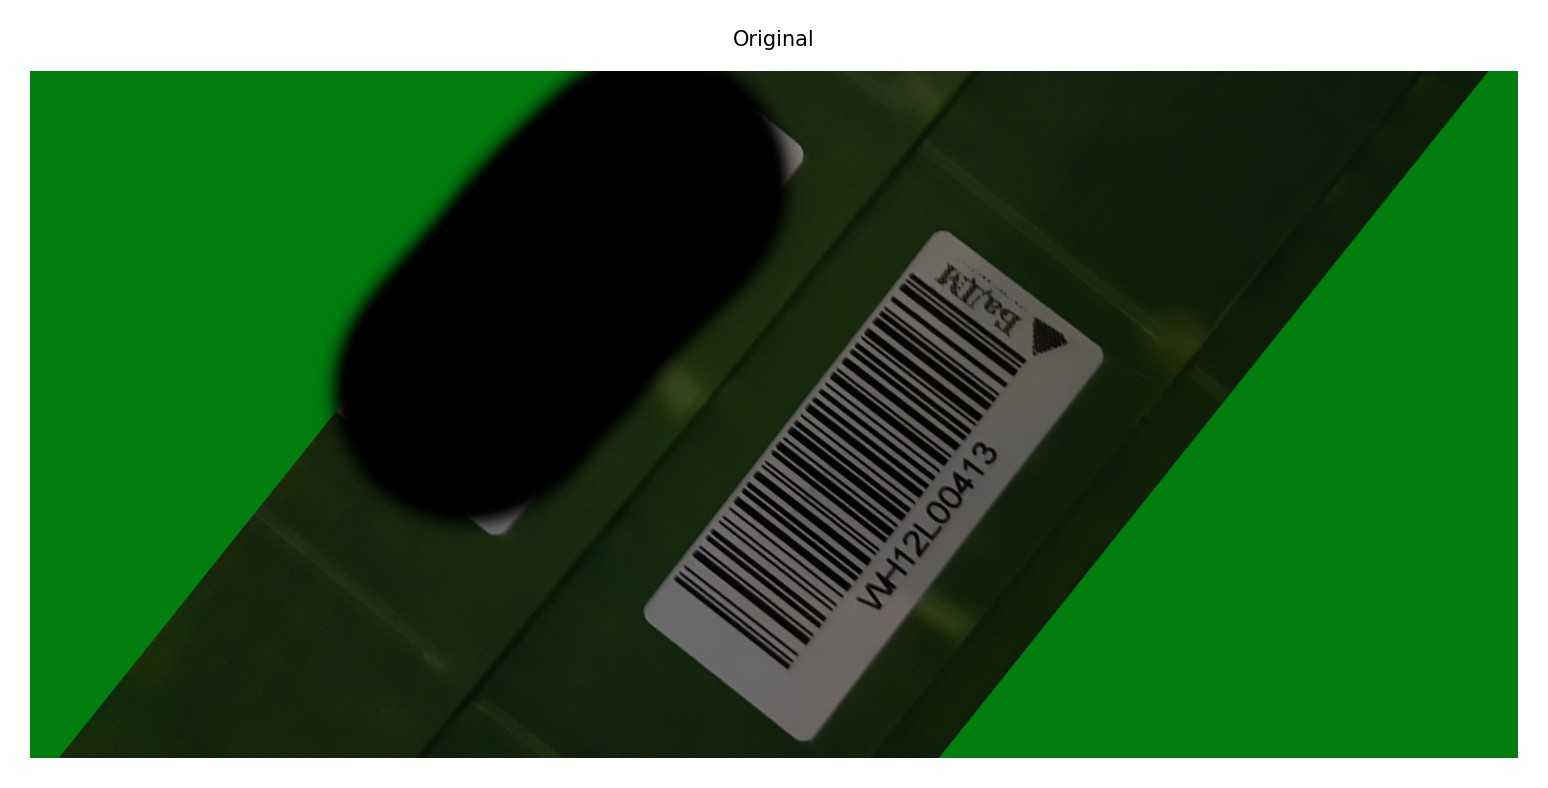

In [6]:
path = 'barcode database/img (2).jpg'
img = cv2.imread(path)
img = scale_frame(40, img)

plt.figure(dpi=300)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title(label='Original', fontsize=5)
plt.show()

Rotation: 32 degrees
Data: WH12L00413
Type: CODE128


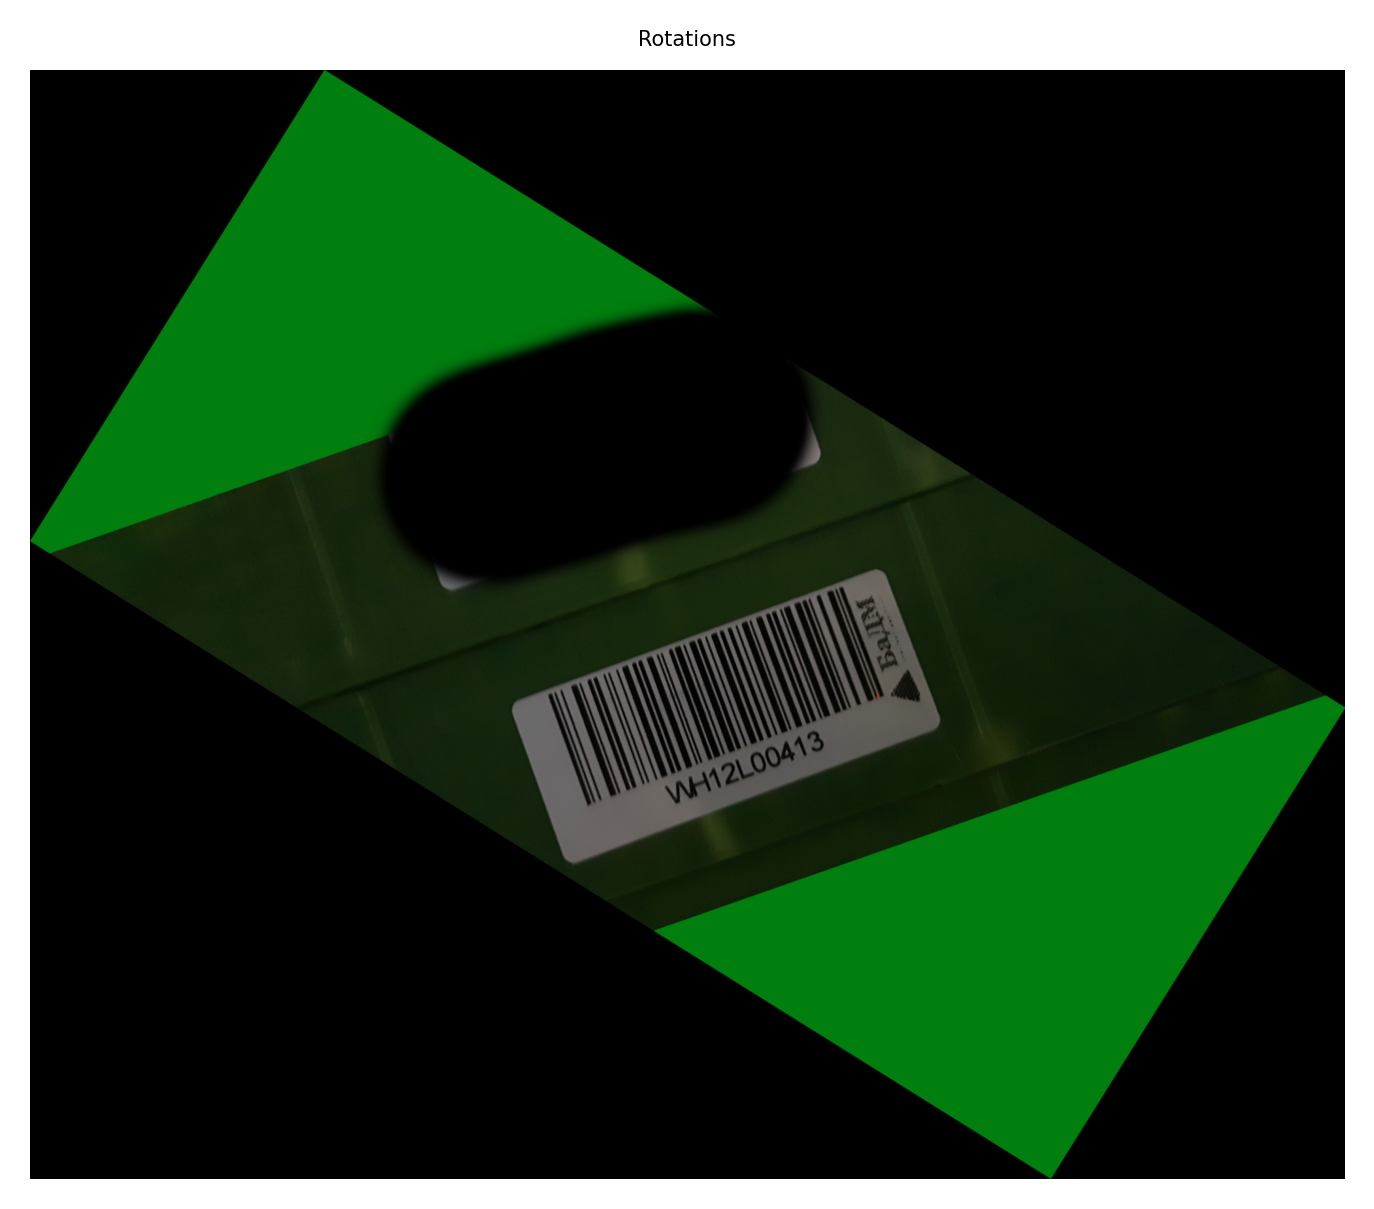

In [7]:
[img1, bc_data, bc_type, angle_frm] = barcode_read_iter(img, 2, 45)

print(f'Rotation: {angle_frm} degrees')
print(f'Data: {bc_data}')
print(f'Type: {bc_type}')

plt.figure(dpi=300)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title(label='Rotations', fontsize=5)
plt.show()

C:\Work\Python39\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Rotation: 52 degrees
Data: WH12L00413
Type: CODE128


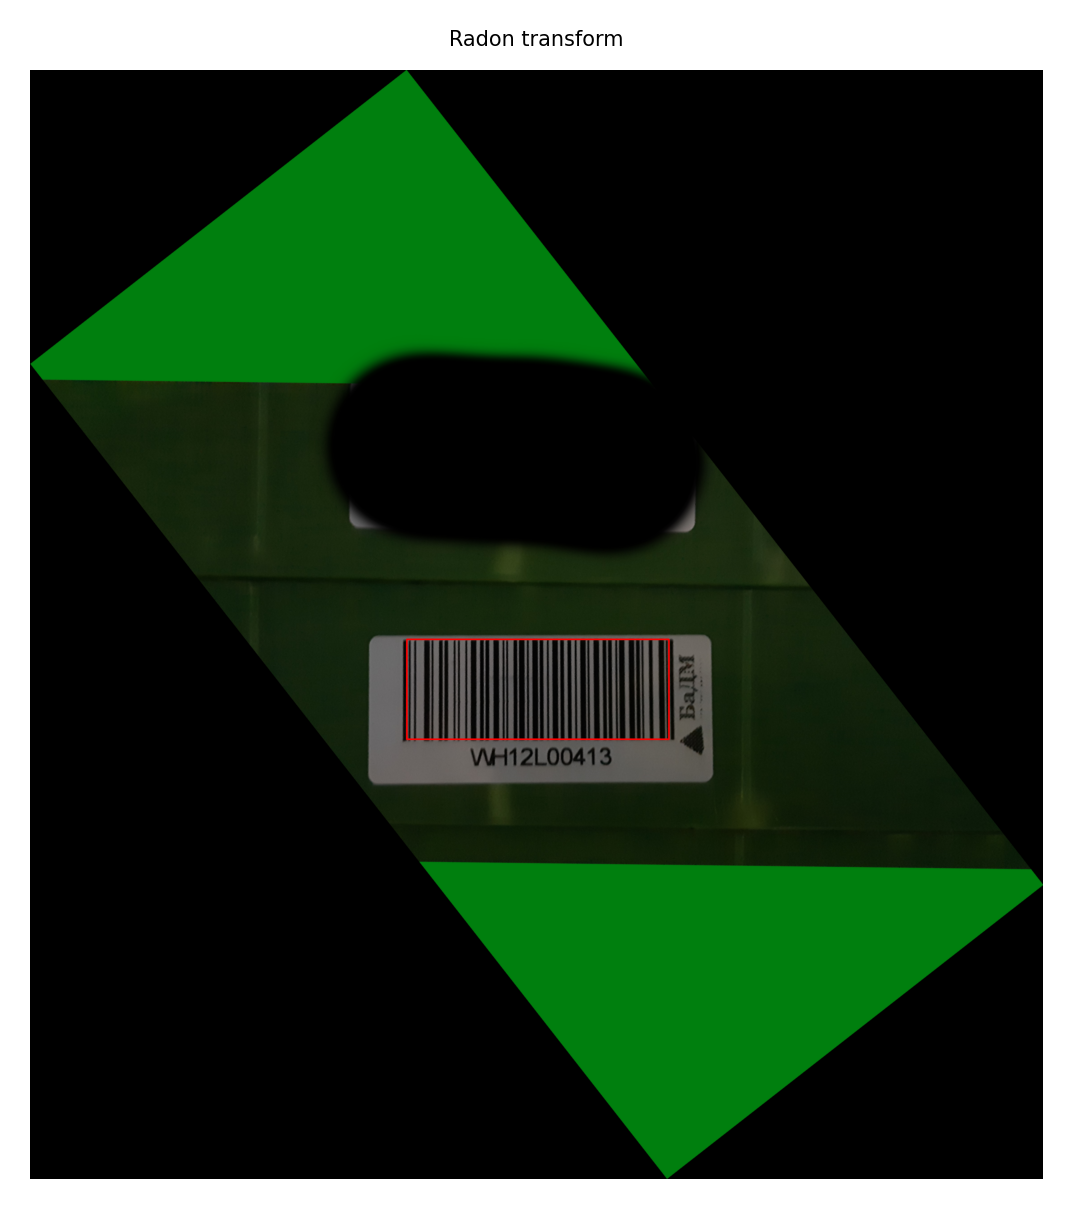

In [8]:
[img2, bc_data, bc_type, angle_frm] = barcode_read_radon(img)

print(f'Rotation: {angle_frm} degrees')
print(f'Data: {bc_data}')
print(f'Type: {bc_type}')

plt.figure(dpi=300)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title(label='Radon transform', fontsize=5)
plt.show()